<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Customer_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


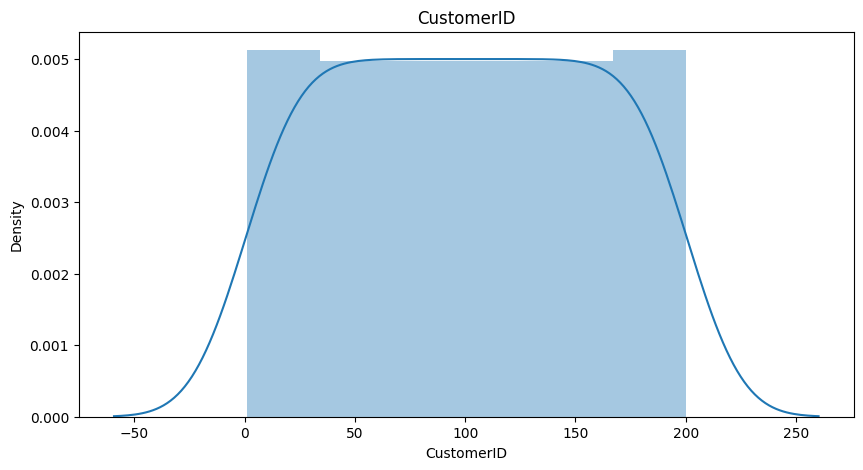

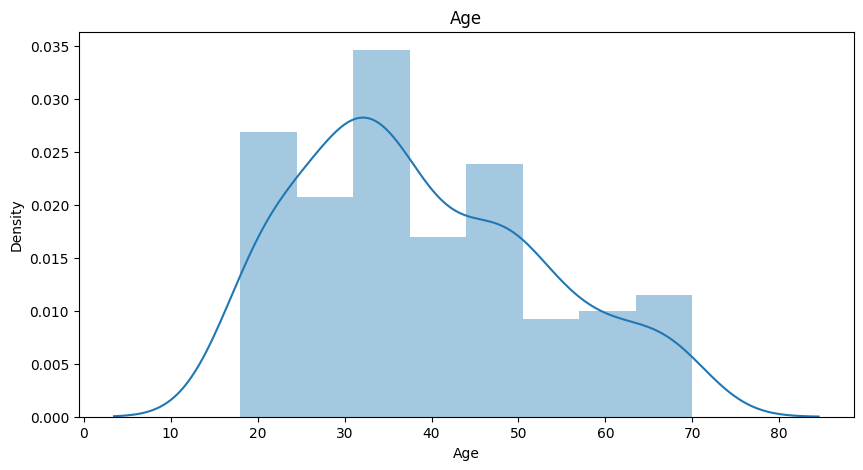

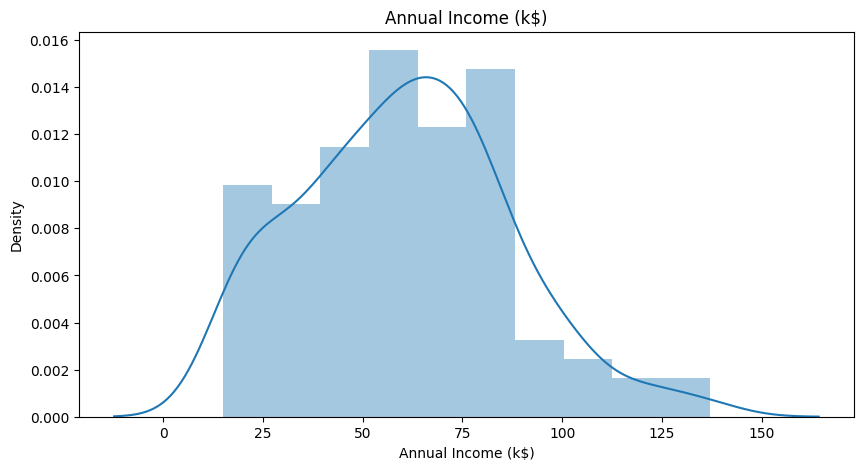

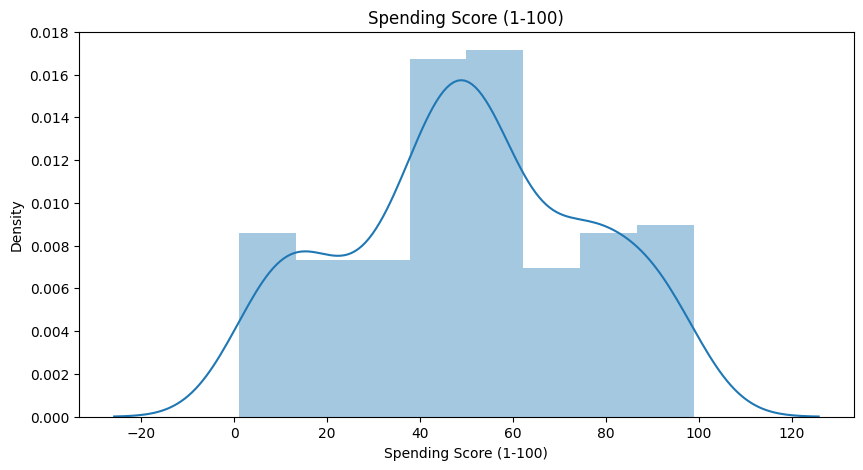

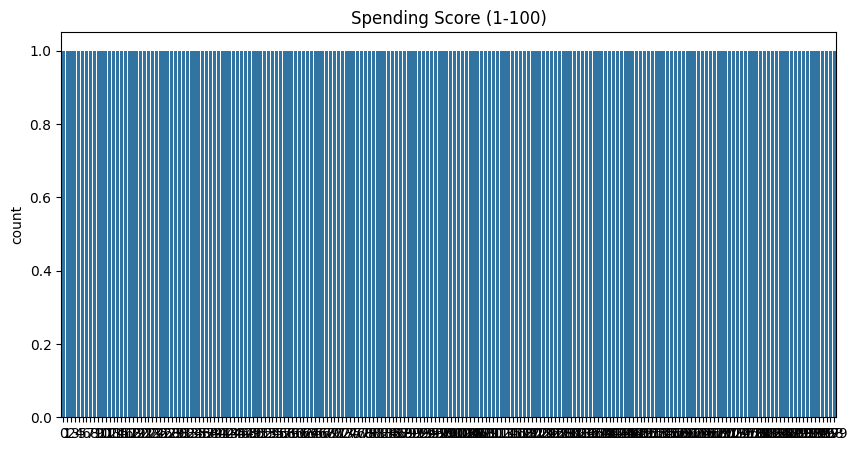

In [3]:
for col in df:
  if df[col].dtypes!='object':
    plt.figure(figsize=(10,5))
    plt.title(col)
    sns.distplot(df[col])
    plt.show()
else:
  plt.figure(figsize=(10,5))
  plt.title(col)
  sns.countplot(df[col])
  plt.show()
#

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [12]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
df['Gender']=ohe.fit_transform(df['Gender'].values.reshape(-1,1))


In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(df)

In [9]:
X=df[:,:]

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [12]:
wcss

[86.68148216035951,
 37.27227241211877,
 29.552857611943868,
 22.39096001192855,
 19.062840919692903,
 16.413737030973795,
 14.221778248633628,
 12.243825066854685,
 10.600432969550855,
 9.668482302211688]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

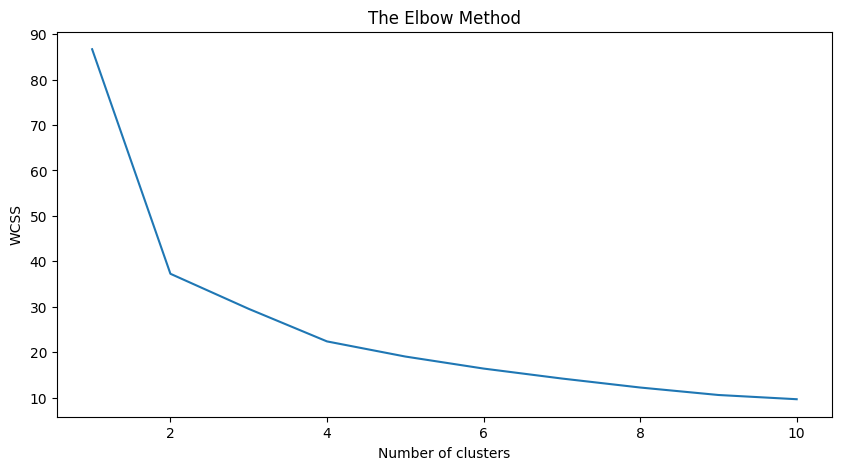

In [13]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt

In [28]:
X

array([[ 1., 39.],
       [ 1., 81.],
       [ 0.,  6.],
       [ 0., 77.],
       [ 0., 40.],
       [ 0., 76.],
       [ 0.,  6.],
       [ 0., 94.],
       [ 1.,  3.],
       [ 0., 72.],
       [ 1., 14.],
       [ 0., 99.],
       [ 0., 15.],
       [ 0., 77.],
       [ 1., 13.],
       [ 1., 79.],
       [ 0., 35.],
       [ 1., 66.],
       [ 1., 29.],
       [ 0., 98.],
       [ 1., 35.],
       [ 1., 73.],
       [ 0.,  5.],
       [ 1., 73.],
       [ 0., 14.],
       [ 1., 82.],
       [ 0., 32.],
       [ 1., 61.],
       [ 0., 31.],
       [ 0., 87.],
       [ 1.,  4.],
       [ 0., 73.],
       [ 1.,  4.],
       [ 1., 92.],
       [ 0., 14.],
       [ 0., 81.],
       [ 0., 17.],
       [ 0., 73.],
       [ 0., 26.],
       [ 0., 75.],
       [ 0., 35.],
       [ 1., 92.],
       [ 1., 36.],
       [ 0., 61.],
       [ 0., 28.],
       [ 0., 65.],
       [ 0., 55.],
       [ 0., 47.],
       [ 0., 42.],
       [ 0., 42.],
       [ 0., 52.],
       [ 1., 60.],
       [ 0.,

In [14]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [15]:
y_kmeans

array([3, 3, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 4, 3, 1, 3, 0, 2, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 2, 0, 2, 0, 3, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2,
       1, 2, 1, 2, 2, 2, 1, 3, 2, 0, 1, 0, 1, 0, 2, 0, 0, 3, 1, 1, 0, 3,
       1, 1, 3, 2, 0, 1, 1, 1, 0, 3, 1, 3, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 3, 2, 1, 0, 3, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 4, 3, 0, 3, 4, 3,
       2, 2, 4, 2, 1, 3, 4, 2, 1, 3, 2, 2, 4, 3, 0, 2, 1, 3, 4, 3, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 0, 2, 4, 2, 1, 3, 4, 3, 4, 3, 1, 2,
       0, 3, 0, 3, 1, 2, 4, 2, 1, 3, 1, 3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3,
       4, 3], dtype=int32)

In [16]:
X[y_kmeans==0]

array([[1.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.65384615, 0.06557377, 0.28571429],
       [1.        , 0.80769231, 0.12295082, 0.03061224],
       [1.        , 0.67307692, 0.14754098, 0.03061224],
       [1.        , 0.57692308, 0.19672131, 0.35714286],
       [1.        , 0.78846154, 0.2295082 , 0.60204082],
       [1.        , 0.55769231, 0.2295082 , 0.40816327],
       [1.        , 0.98076923, 0.23770492, 0.45918367],
       [1.        , 0.67307692, 0.25409836, 0.45918367],
       [1.        , 1.        , 0.25409836, 0.56122449],
       [1.        , 0.86538462, 0.2704918 , 0.51020408],
       [1.        , 1.        , 0.27868852, 0.55102041],
       [1.        , 0.78846154, 0.31967213, 0.46938776],
       [1.        , 0.75      , 0.31967213, 0.51020408],
       [1.        , 0.94230769, 0.31967213, 0.40816327],
       [1.        , 0.57692308, 0.31967213, 0.45918367],
       [1.        , 0.57692308,

In [17]:
df[y_kmeans==1]

array([[0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.53846154, 0.08196721, 0.04081633],
       [0.        , 0.69230769, 0.10655738, 0.13265306],
       [0.        , 0.51923077, 0.10655738, 0.31632653],
       [0.        , 0.42307692, 0.1147541 , 0.30612245],
       [0.        , 0.59615385, 0.14754098, 0.13265306],
       [0.        , 0.46153846, 0.1557377 , 0.16326531],
       [0.        , 0.34615385, 0.18032787, 0.25510204],
       [0.        , 0.90384615, 0.18852459, 0.34693878],
       [0.        , 0.59615385, 0.19672131, 0.2755102 ],
       [0.        , 0.61538462, 0.20491803, 0.55102041],
       [0.        , 0.59615385, 0.22131148, 0.52040816],
       [0.        , 0.61538462, 0.2295082 , 0.44897959],
       [0.        , 0.63461538, 0.23770492, 0.5       ],
       [0.        , 0.94230769,

In [18]:
df[y_kmeans==2]

array([[0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.32692308, 0.06557377, 0.98979592],
       [0.        , 0.09615385, 0.1147541 , 0.87755102],
       [0.        , 0.05769231, 0.12295082, 0.73469388],
       [0.        , 0.05769231, 0.14754098, 0.81632653],
       [0.        , 0.23076923, 0.1557377 , 0.73469388],
       [0.        , 0.03846154, 0.18032787, 0.75510204],
       [0.        , 0.25      , 0.19672131, 0.6122449 ],
       [0.        , 0.11538462, 0.19672131, 0.65306122],
       [0.        , 0.17307692, 0.20491803, 0.46938776],
       [0.        , 0.21153846, 0.20491803, 0.41836735],
       [0.        , 0.25      ,

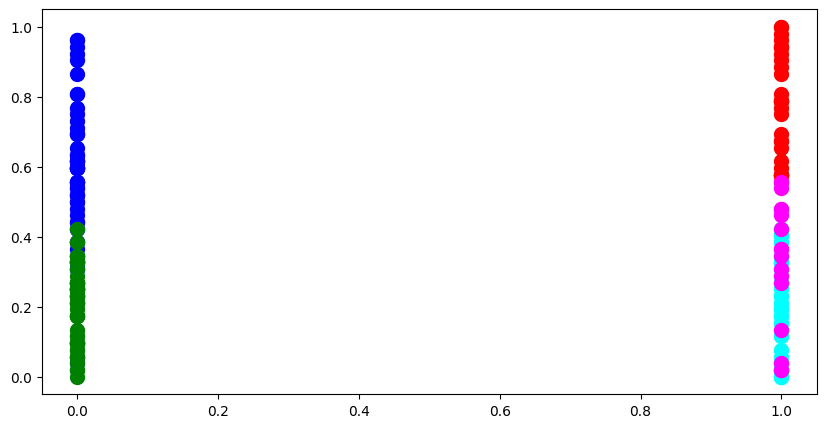

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

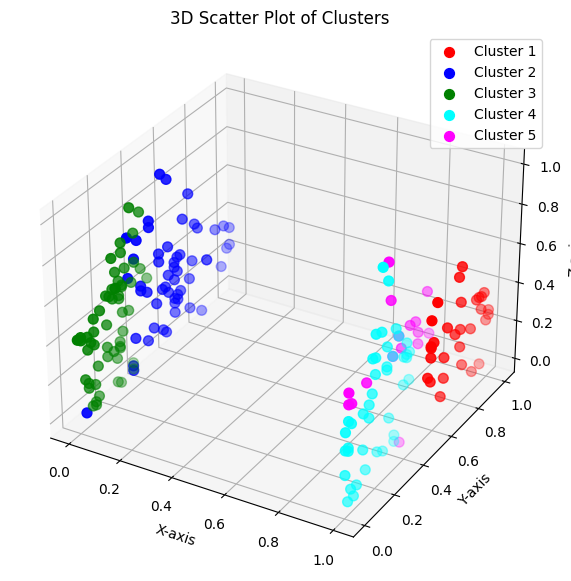

In [20]:



from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()
